In [40]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
ensayo3_excel= r"C:\Users\rayom\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel= r"C:\Users\rayom\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_csv= r"C:\Users\rayom\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"

ensayo3_dict= pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0)
ensayo4_dict= pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0)

ensayo3_dict.keys() #Para ver las llaves

dict_keys(['Sujeto1', 'Sujeto2', 'Sujeto3', 'Sujeto4', 'Sujeto5', 'Sujeto6', 'Sujeto7', 'Sujeto8', 'Sujeto9', 'Sujeto10', 'Sujeto11', 'Sujeto12', 'Sujeto13', 'Sujeto14', 'Sujeto15', 'Sujeto16', 'Sujeto17', 'Sujeto18', 'Sujeto19', 'Sujeto20', 'Sujeto21', 'Sujeto22', 'Sujeto23', 'Sujeto24', 'Sujeto25', 'Sujeto26', 'Sujeto27', 'Sujeto28', 'Sujeto29', 'Sujeto30', 'Sujeto31', 'Sujeto32', 'Sujeto33', 'Sujeto34', 'Sujeto35', 'Sujeto36', 'Sujeto37', 'Sujeto38', 'Sujeto39', 'Sujeto40', 'Sujeto41', 'Sujeto42', 'Sujeto43', 'Sujeto44', 'Sujeto45', 'Sujeto46', 'Sujeto47', 'Sujeto48', 'Sujeto49', 'Sujeto50', 'Sujeto51', 'Sujeto52', 'Sujeto53', 'Sujeto54', 'Sujeto55', 'Sujeto56', 'Sujeto57', 'Sujeto58', 'Sujeto59', 'Sujeto60', 'Sujeto61', 'Sujeto62', 'Sujeto63', 'Sujeto64', 'Sujeto65', 'Sujeto66', 'Sujeto67', 'Sujeto68', 'Sujeto69', 'Sujeto70', 'Sujeto71', 'Sujeto72', 'Sujeto73', 'Sujeto74', 'Sujeto75', 'Sujeto76', 'Sujeto77', 'Sujeto78', 'Sujeto79', 'Sujeto80', 'Sujeto81', 'Sujeto82', 'Sujeto83', 'S

In [39]:
ensayos_dfs=[]
for sujeto in ensayo3_dict.keys():
    ensayos_dfs.append(ensayo3_dict[sujeto])

ensayo_dfs=[1]

In [43]:
stack= np.stack([df.values for df in ensayos_dfs])

In [44]:
stack.shape

(109, 64, 64)

In [46]:
threshold = 0.5
porcentaje = 0.6

stack=np.stack([df.values for df in ensayos_dfs])
# Aplicamos filtro por cada matriz
above = stack > threshold

N= len (ensayos_dfs) # - 109
count_above= above.sum(axis=0) #Contando cuantos valores superan el umbral en celda

min_requerido = int(np.ceil(porcentaje*N)) # la función ceil redondea hacia arriba 0.6*109 = 65.4
#CON ESTO BASTARA CON QUEDARNOS CON LAS CELDAS DE 'above' QUE CUMPLAN CON min_requerido
# PARA ASÍ TENER EL NÚMERO DE SUJETOS QUE SUPERAN EL UMBRAL

result_bool = count_above >= min_requerido

result_df= pd.DataFrame(result_bool,
                        index=ensayos_dfs[0].index,
                        columns=ensayos_dfs[0].columns).astype(int)

<Axes: >

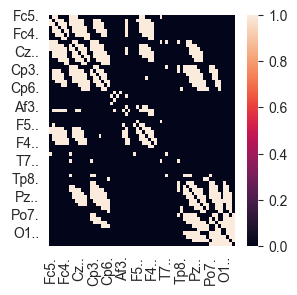

In [58]:
plt.figure(figsize=(3, 3))

sns.heatmap(result_df)

<Axes: >

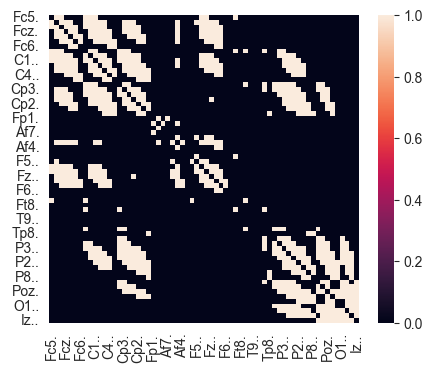

In [57]:
plt.figure(figsize=(5, 4))

sns.heatmap(result_df)

# GENERAR ESTADÍSTICOS PARA DECIDIR UMBRALES

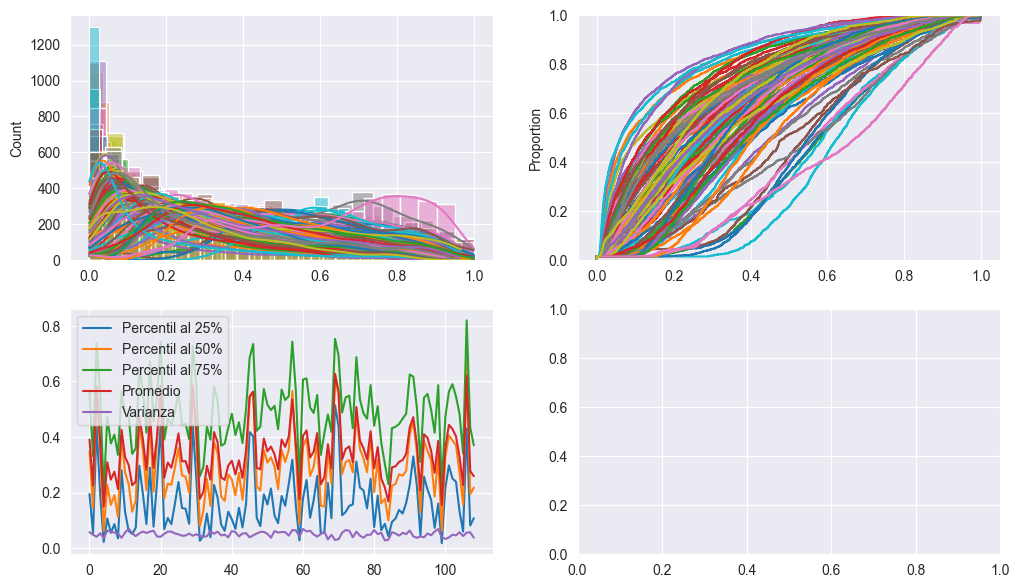

In [64]:
ensayos_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []

fig, axes= plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos_dfs:
    #Calculo de estadísticos
    data= sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    #Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Promedio')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].legend()